In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

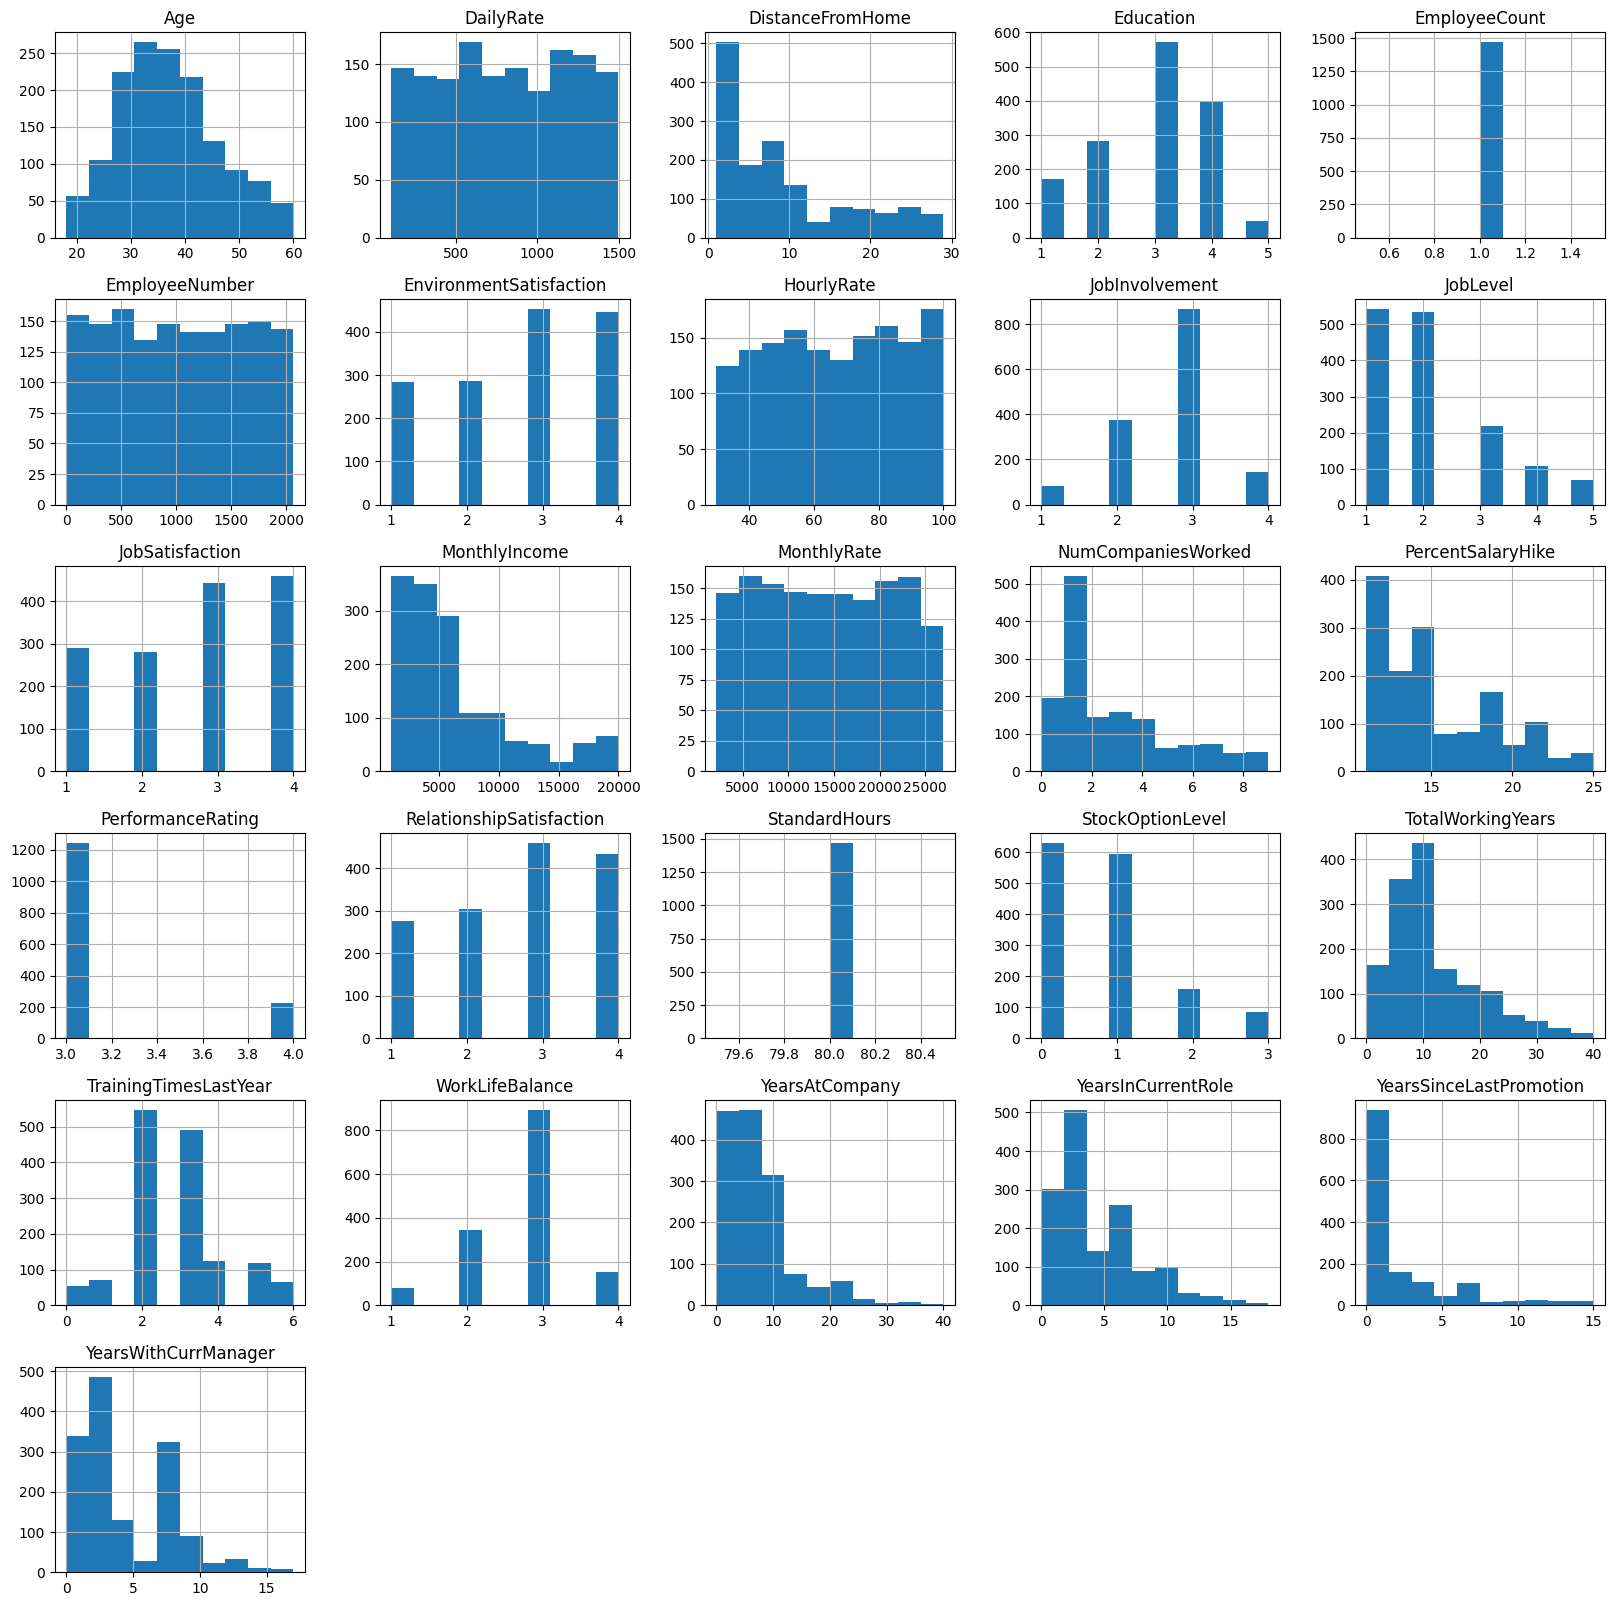

In [7]:
df.hist(figsize=(20,20))
plt.show()

In [8]:
# Here we start the perprocessing of data
# And we remove that column which only have one unique data
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [9]:
#  Here we find each object datatype holding column and it's number of unique categories
for col in df.columns[1:]:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].nunique()}")

Attrition: 2
BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
OverTime: 2


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb = LabelEncoder()

for col in df.columns[1:]:
    if df[col].dtype == "object" and len(list(df[col].unique())) == 2:
        df[col] = lb.fit_transform(df[col])
        

In [12]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0       0  ...                  3                         1                 0   
1       1  ...                  4                         4                 1   
2       1  ...                  3                         2                 0   
3       0  ...                  3                         3                 0   
4       1  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [13]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'MaritalStatus', 'Department'], drop_first=True)

In [14]:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education EducationField  \
0   41          1       1102                 1          2  Life Sciences   
1   49          0        279                 8          1  Life Sciences   
2   37          1       1373                 2          2          Other   
3   33          0       1392                 3          4  Life Sciences   
4   27          0        591                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  BusinessTravel_Travel_Frequently  \
0                     5                             False   
1                     7                              True   
2                     0                             False   
3                     0                              True   
4                     2                             False   

   BusinessTravel_Travel_Rarely  MaritalStatus_Married  MaritalStatus_Single  \
0                          True                  False                  True   
1                         False                   True                 False   
2                          True                  False                  True   
3                         False                   True                 False   
4                          True                   True                 False   

   Department_Research & Development  Department_Sales  
0                              False              True  
1                               True             False  
2                               True             False  
3                               True             False  
4                               True             False  

[5 rows x 34 columns]

In [15]:
df.columns.shape

(34,)

In [16]:
target = df['Attrition']
X = df.drop(['Attrition'], axis=1)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


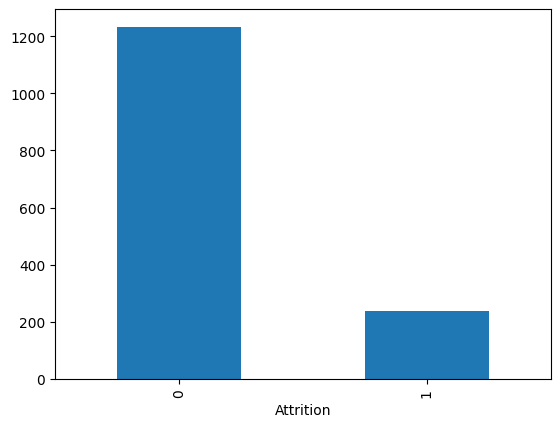

In [17]:
print(target.value_counts(normalize=True))
target.value_counts().plot(kind='bar')
plt.show()

#### So, here we face the same problem that is our data is imbalance dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=1, stratify=target)


In [20]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols=['EducationField','JobRole'])

X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

In [21]:
X_train.head()

Age  DailyRate  DistanceFromHome  Education  EducationField  \
1052   30        990                 7          3        0.266645   
1267   34       1375                10          3        0.137500   
997    27        135                17          4        0.137500   
882    36        363                 1          3        0.266645   
404    28       1300                17          2        0.139785   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
1052                        3       1          64               3         1   
1267                        4       1          87               3         2   
997                         4       0          51               3         1   
882                         3       0          77               1         3   
404                         3       1          79               3         2   

      ...  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
1052  ...               1                   0                        0   
1267  ...              15                  14                        0   
997   ...               8                   2                        7   
882   ...               7                   7                        7   
404   ...              10                   0                        1   

      YearsWithCurrManager  BusinessTravel_Travel_Frequently  \
1052                     0                             False   
1267                     7                             False   
997                      7                             False   
882                      7                             False   
404                      8                             False   

      BusinessTravel_Travel_Rarely  MaritalStatus_Married  \
1052                         False                  False   
1267                         False                  False   
997                           True                  False   
882                           True                  False   
404                           True                  False   

      MaritalStatus_Single  Department_Research & Development  \
1052                 False                               True   
1267                 False                              False   
997                   True                               True   
882                  False                               True   
404                  False                               True   

      Department_Sales  
1052             False  
1267              True  
997              False  
882              False  
404              False  

[5 rows x 33 columns]

In [66]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [67]:
print("Distribution of target {}".format(y_sm.value_counts()))

Distribution of target Attrition
0    986
1    986
Name: count, dtype: int64


# Data Preprocessing is done now we will apply decision tree algorithm

In [68]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=1)

In [69]:
from sklearn.model_selection import KFold, cross_validate
kfold = KFold(n_splits=5)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

In [70]:
cv_acc_results['train_score']

array([1., 1., 1., 1., 1.])

In [71]:
cv_acc_results['test_score']

array([0.77721519, 0.78227848, 0.75380711, 0.93401015, 0.89847716])

In [72]:
cv_acc_results['test_score'].mean()

np.float64(0.8291576174259461)

In [73]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [74]:
features = X_sm.columns

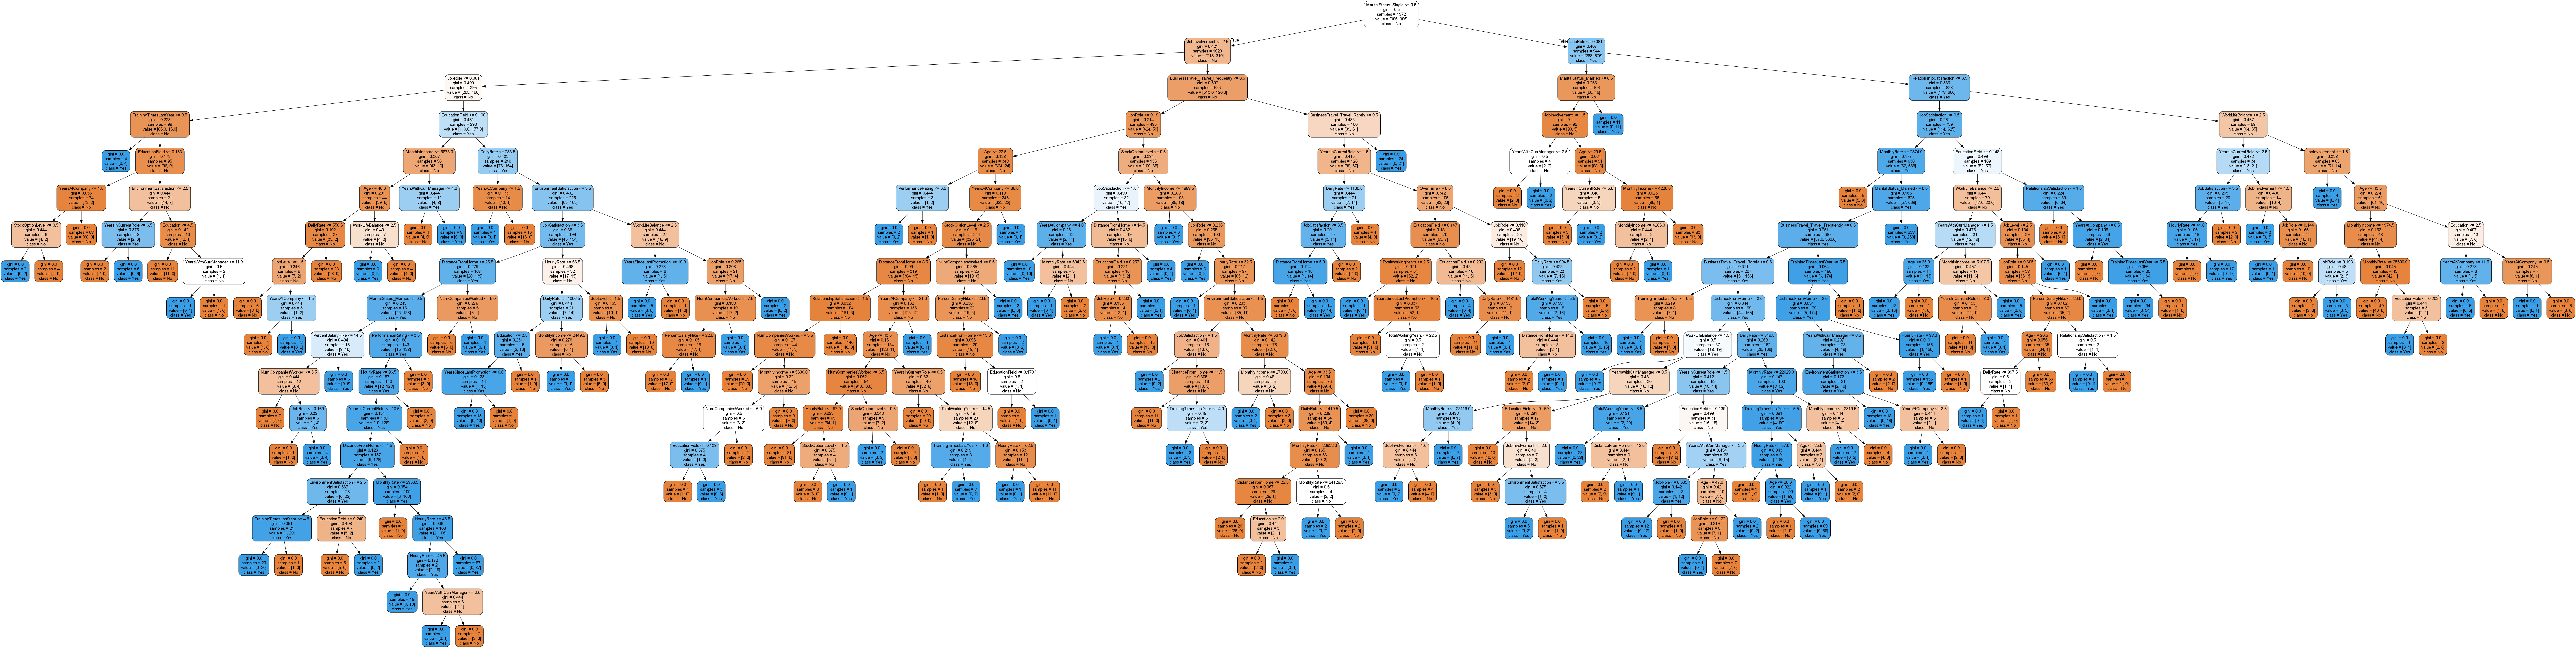

In [75]:
tree_clf = tree_clf.fit(X_sm, y_sm)

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [76]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=10, min_samples_leaf=5, min_samples_split=10)

cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

In [77]:
cv_acc_results['train_score'].mean()

np.float64(0.930908987159364)

In [78]:
cv_acc_results['test_score'].mean()

np.float64(0.8017682966009124)

In [79]:
tree_clf = tree_clf.fit(X_sm, y_sm)
pred = tree_clf.predict(X_test)

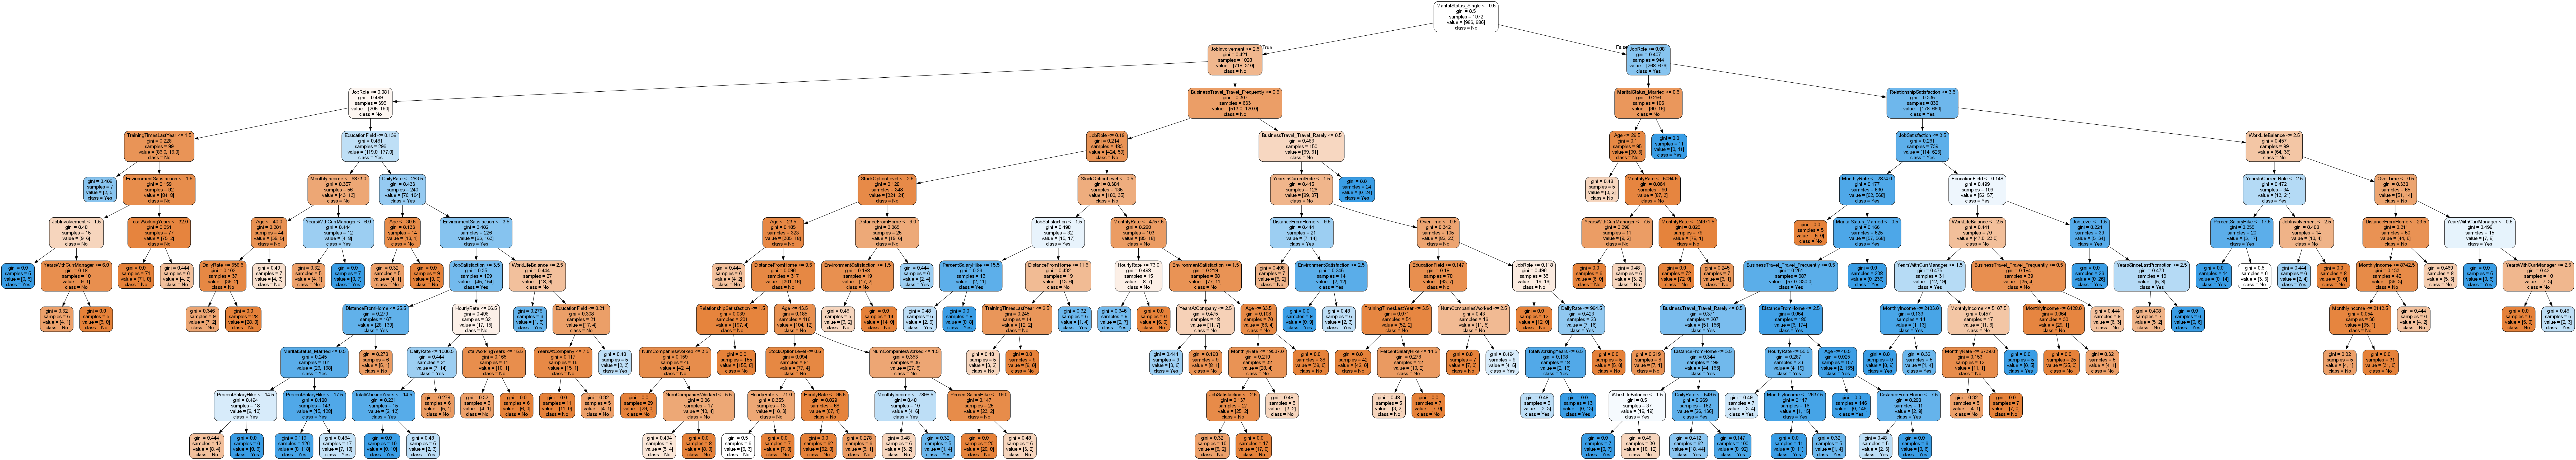

In [80]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

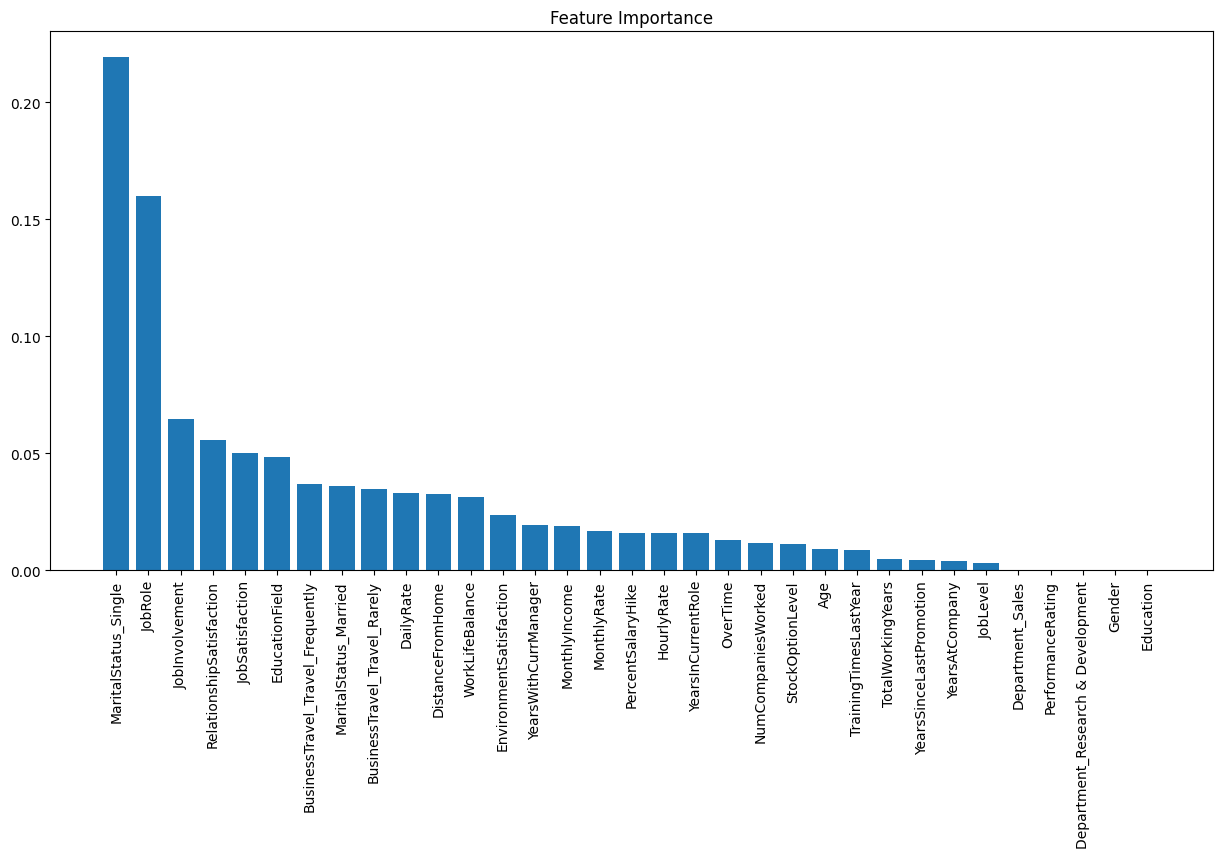

In [81]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [X_train.columns[i] for i in indices]

plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Confussion Matrix:{}".format(confusion_matrix(y_test, pred)))
print("Classification report:\n", classification_report(y_test, pred))

Confussion Matrix:[[207  40]
 [ 28  19]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       247
           1       0.32      0.40      0.36        47

    accuracy                           0.77       294
   macro avg       0.60      0.62      0.61       294
weighted avg       0.79      0.77      0.78       294

